# Buisiness objective

 Building a models to predict the Sales of a store.

In [111]:
#importing libraries
import pandas as pd
import numpy as np

#visualization
import matplotlib.pyplot as plt
import seaborn as sns

#sklearn library
import sklearn
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold, cross_val_score, RepeatedStratifiedKFold

#errors
from sklearn.metrics import mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

In [119]:
#Reading the file
sales_df= pd.read_csv('D:\data science\level_3\project_1\DS3_C6_S1_Regression_StoreSales_Data_Project.csv')
sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.074402,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.064299,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [120]:
#checking null values
sales_df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [121]:
#Missing value treatment(filling missing values with mean)
sales_df['Item_Outlet_Sales']= sales_df['Item_Outlet_Sales'].fillna(sales_df['Item_Outlet_Sales'].mean())
sales_df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [122]:
#Duplicating the data
new_sales_df= sales_df.copy()

In [123]:
#describing the data
sales_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,14204.000000,14204.000000,14204.000000,14204.000000,14204.000000
mean,12.793380,0.070301,141.004977,1997.830681,2181.288914
std,4.651716,0.048621,62.086938,8.371664,1321.864430
min,4.555000,0.003575,31.290000,1985.000000,33.290000
25%,8.710000,0.033143,94.012000,1987.000000,1468.089000
50%,12.600000,0.062347,142.247000,1999.000000,2181.288914
75%,16.750000,0.094037,185.855600,2004.000000,2181.288914
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [124]:
#Checking datatype of each feature
sales_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [125]:
#Feature engeneering
#Converting categorical datatype to numerical using label encoder
for col in sales_df.columns:
    #print(col)
    if sales_df[col].dtypes=='object':
        #print(col)
        sales_df[col]= LabelEncoder().fit_transform(sales_df[col])

sales_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.074402,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,0,0.064299,9,53.8614,1,1987,0,2,1,994.7052


In [163]:
#Scaling the data
scaler= MinMaxScaler()

sales_df1= sales_df.drop('Item_Outlet_Sales', axis=1)
scaled_df= pd.DataFrame(scaler.fit_transform(sales_df1.to_numpy()), columns= sales_df1.columns)
scaled_df['Item_Outlet_Sales']= sales_df['Item_Outlet_Sales']
scaled_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0.100128,0.282525,0.0,0.038399,0.266667,0.927507,1.000000,0.583333,0.5,0.0,0.333333,3735.1380
1,0.005135,0.081274,1.0,0.048346,0.933333,0.072068,0.333333,1.000000,0.5,1.0,0.666667,443.4228
2,0.424904,0.770765,0.0,0.040593,0.666667,0.468288,1.000000,0.583333,0.5,0.0,0.333333,2097.2700
3,0.719512,0.871986,1.0,0.218055,0.400000,0.640093,0.000000,0.541667,0.5,1.0,0.000000,732.3800
4,0.832478,0.260494,0.0,0.186950,0.600000,0.095805,0.111111,0.083333,0.0,1.0,0.333333,994.7052


In [127]:
#finding correlation
corr= sales_df.corr()
corr.style.background_gradient(cmap='Greens')

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Identifier,1.000000,0.050768,-0.111079,-0.040769,-0.012048,0.010743,-0.001089,-0.002954,0.002209,-0.002473,-0.004532,0.002220
Item_Weight,0.050768,1.000000,-0.033737,-0.020472,0.031884,0.035751,0.003002,0.000247,0.000944,-0.001719,0.001913,0.010259
Item_Fat_Content,-0.111079,-0.033737,1.000000,0.048315,-0.147733,-0.004019,-0.001095,0.000137,-0.000827,0.001373,-0.000228,0.014494
Item_Visibility,-0.040769,-0.020472,0.048315,1.000000,-0.037821,-0.009144,-0.108731,-0.090833,0.026808,-0.020550,-0.172744,-0.105064
Item_Type,-0.012048,0.031884,-0.147733,-0.037821,1.000000,0.043948,0.001126,0.003061,-0.001080,0.002083,0.004305,0.013194
Item_MRP,0.010743,0.035751,-0.004019,-0.009144,0.043948,1.000000,-0.000555,0.000141,-0.001305,0.000838,0.000136,0.440979
Outlet_Identifier,-0.001089,0.003002,-0.001095,-0.108731,0.001126,-0.000555,1.000000,0.079047,0.423623,-0.716151,0.099899,0.125742
Outlet_Establishment_Year,-0.002954,0.000247,0.000137,-0.090833,0.003061,0.000141,0.079047,1.000000,0.428387,-0.089328,-0.122519,-0.038061
Outlet_Size,0.002209,0.000944,-0.000827,0.026808,-0.001080,-0.001305,0.423623,0.428387,1.000000,-0.590677,-0.260496,-0.046879
Outlet_Location_Type,-0.002473,-0.001719,0.001373,-0.020550,0.002083,0.000838,-0.716151,-0.089328,-0.590677,1.000000,0.467251,0.069224


In [63]:
#selecting the best features based on correlation map
features= []
for i in scaled_df:
    if abs(scaled_df[i].corr(scaled_df['Item_Outlet_Sales']))>0.1:
        features.append(i)
features

['Item_Visibility',
 'Item_MRP',
 'Outlet_Identifier',
 'Outlet_Type',
 'Item_Outlet_Sales']

<AxesSubplot:>

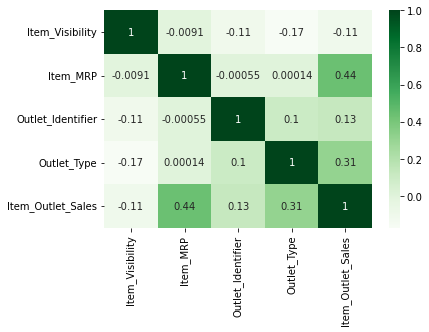

In [12]:
#heatmap for the selected features
new_scaled_df= scaled_df[features]
sns.heatmap(new_scaled_df.corr(),annot=True, cmap='Greens',fmt='.2g')

# EDA

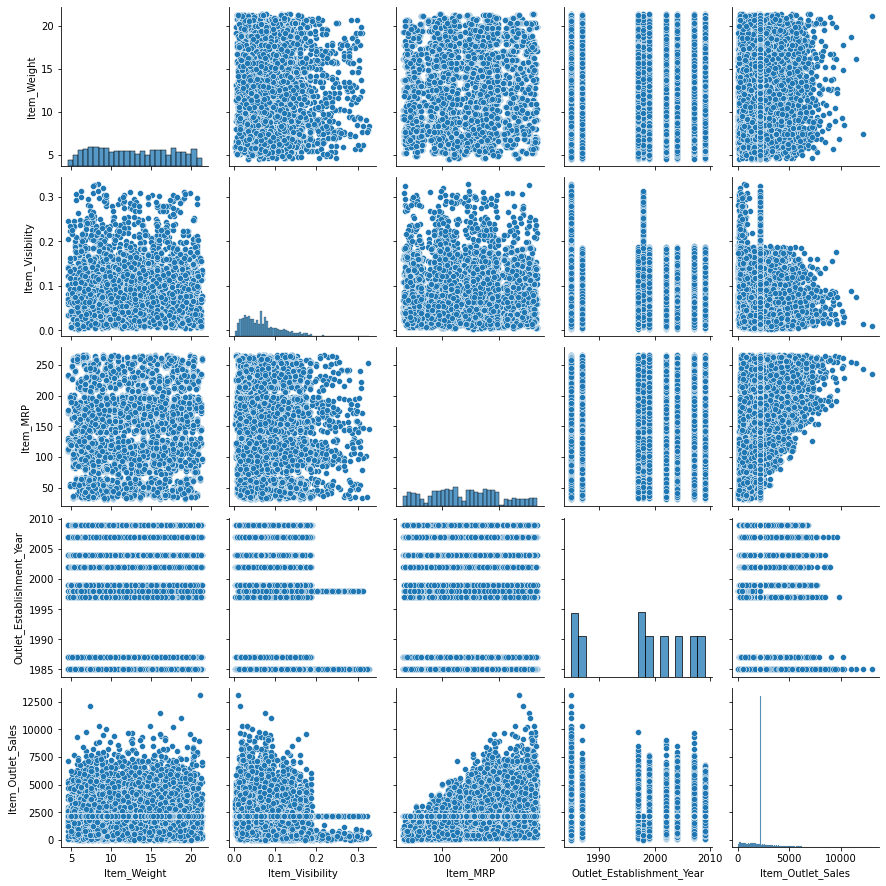

In [13]:
#Pairplot for all numerical columns
sns.pairplot(new_sales_df)

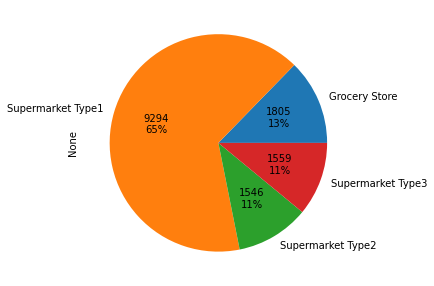

In [14]:
#count of each outlet types
labels=new_sales_df['Outlet_Type'].unique()
def label_function(val):
    return f'{val / 100 * len(new_sales_df):.0f}\n{val:.0f}%'
fig, ax = plt.subplots(ncols=1, figsize=(20, 5))
new_sales_df.groupby(new_sales_df['Outlet_Type']).size().plot(kind='pie', autopct=label_function)
plt.show()

The outlet type with "Supermarket Type1" are more with 65%.

<AxesSubplot:xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

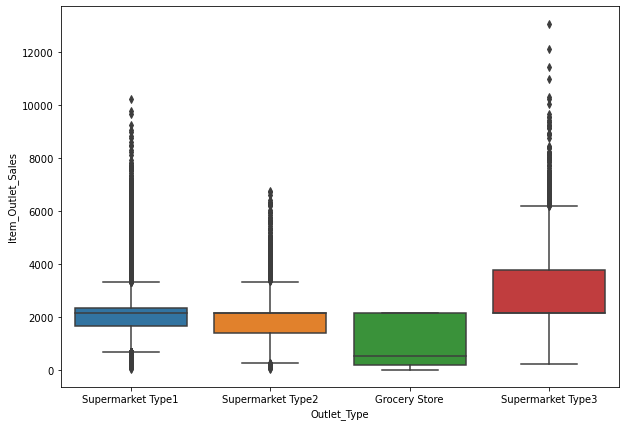

In [15]:
#comparing outlet_type with sales
plt.figure(figsize=(10,7))
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=new_sales_df)

The outlet_type with "supermarket type3" has more sales has compared to other outlets.

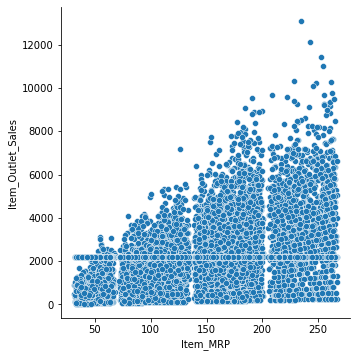

In [16]:
#comparing item mrp and sales
sns.pairplot(new_sales_df, x_vars='Item_MRP', y_vars='Item_Outlet_Sales', height=5)
plt.show()

As the item_MRP increasing the item_outlet sales increasing.

In [164]:
#Defining X and y variable
y= scaled_df['Item_Outlet_Sales'].values #dependent varibale
X= scaled_df.drop('Item_Outlet_Sales', axis=1).values   #independent variables

In [165]:
#Splitting the data
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)
print('Shape of dataframes-')
print('X_train= {} \nX_test= {} \ny_train={} \ny_test={}'.format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))

Shape of dataframes-
X_train= (9942, 11) 
X_test= (4262, 11) 
y_train=(9942,) 
y_test=(4262,)


# Linear Regression

In [166]:
#model building
model1= LinearRegression().fit(X_train,y_train)

#coefficient of determination
coef_deter= model1.score(X_train,y_train)
print('coefficient of determination= ',coef_deter)
print('intercept= ',model1.intercept_)
print('slope= ',model1.coef_)

coefficient of determination=  0.30478884212137447
intercept=  604.2087433040044
slope=  [  11.67487479  -49.72844404   46.24954028 -429.48104043  -67.47460149
 2257.96809971  341.03116957  -25.58215936  -70.10384422  -84.46335013
 1446.24463063]


In [167]:
#Predicting the values for test data
y_pred1= model1.predict(X_test)
y_pred1

array([2866.49755205, 2870.33092348, 2597.2917781 , ..., 2054.23356694,
       1733.54908142, 2038.57569141])

In [168]:
#dataframe for actual and predicted values
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred1}).head()

,Actual,Predicted
0,2181.288914,2866.497552
1,1182.460800,2870.330923
2,2181.288914,2597.291778
3,7717.953600,3479.755323
4,2181.288914,2495.931544


In [169]:
#Finding the errors
mse1= mean_squared_error(y_test, y_pred1)
rmse1= np.sqrt(mse1)
mae1= mean_absolute_error(y_test, y_pred1)

print('MSE= {} \nRMSE={} \nMAE={}'.format(mse1,rmse1,mae1))

MSE= 1200124.3668159524 
RMSE=1095.5018789650487 
MAE=820.485152598435


In [170]:
#accuracy of linear regression model
accuracy1= model1.score(X_train,y_train)

print('Linear Regression model')
print('Accuracy: %.3f ' % accuracy1)

Linear Regression model
Accuracy: 0.305 


In [192]:
#Finding R2 value
#creating two empty lists for storing the results\
names=[]; r2=[]
cv= RepeatedKFold(n_splits=10, n_repeats=3, random_state=11)
r2_1= cross_val_score(model1, X,y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')

r2.append(r2_1)
names.append('LR')

print('R2-Score: %.3f' % np.mean(r2_1))

R2-Score: 0.301


In [172]:
#Finding r2 value without using cross validation
from sklearn.metrics import r2_score
r2_score(y_test, y_pred1)

0.2957035973428743

Text(0.5, 1.0, 'Actual Vs Predicted')

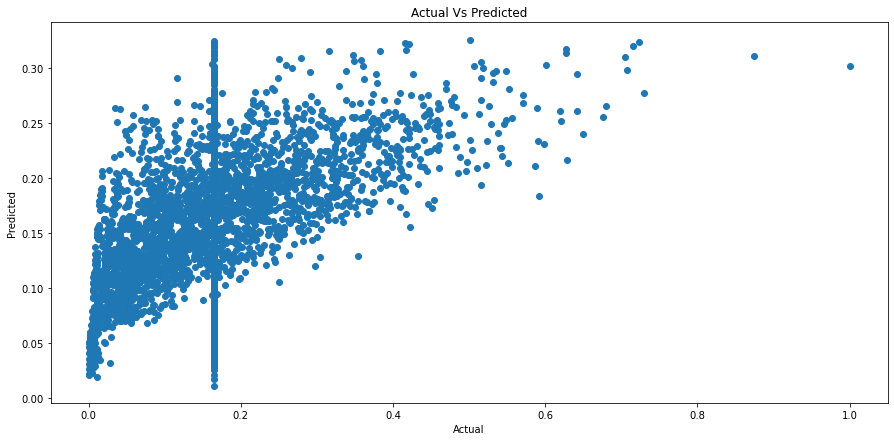

In [72]:
#visualization
plt.figure(figsize=(15,7))
plt.scatter(y_test, y_pred1)

#p1 = max(max(y_test), max(y_pred1))
#p2 = max(min(y_test), min(y_pred1))
#plt.plot([p1, p2], [p1, p2],'r')

plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs Predicted')

# DecisionTree Regressor

In [173]:
from sklearn.tree import DecisionTreeRegressor

model2= DecisionTreeRegressor(max_depth=3)

#fitting the model to train data
model2.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=3)

In [174]:
 #Predicting the outcome of test data
y_pred2= model2.predict(X_test)
print("The predicted outcomes of test data are as follows :\n",y_pred2)

The predicted outcomes of test data are as follows :
 [2000.57339336 2785.48452715 2785.48452715 ... 1072.63597868 2000.57339336
 2000.57339336]


In [175]:
#checking the error values for test data
mse2=mean_squared_error(y_test, y_pred2)
mae2=mean_absolute_error(y_test,y_pred2)
rmse2 = mean_squared_error(y_test, y_pred2, squared=False)
print('MSE= ',mse2,'\nMAE= ',mae2,'\nRMSE= ',rmse2)

MSE=  1144525.259028974 
MAE=  812.7081150149854 
RMSE=  1069.8248730652012


In [176]:
#accuracy of Decisiontree regression model
accuracy2= model2.score(X_train,y_train)

print('Accuracy for DecisionTree Regressor model: %.3f' % accuracy2)

Accuracy for DecisionTree Regressor model: 0.312


In [193]:
#Finding R2 value
cv= RepeatedKFold(n_splits=10, n_repeats=3, random_state=11)
r2_2= cross_val_score(model2, X,y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')

r2.append(r2_2)
names.append('DT')

print('R2-Score: %.3f' % np.mean(r2_2))

R2-Score: 0.315


In [77]:
#Finding r2 value without using cross validation
from sklearn.metrics import r2_score
r2_score(y_test, y_pred2)

0.3283320920956351

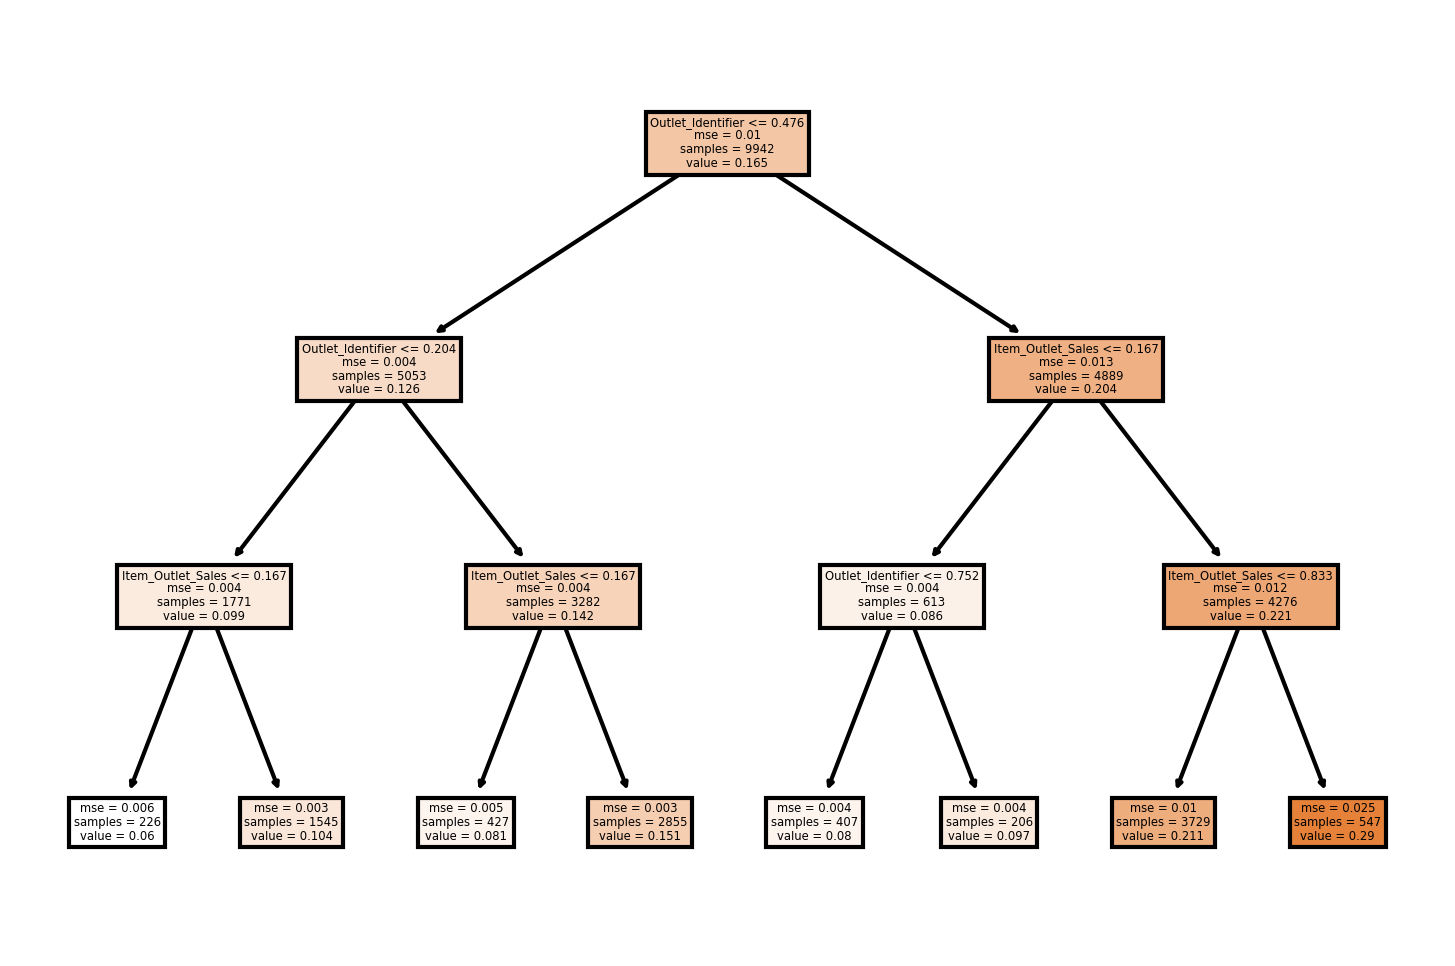

In [78]:
#Decison tree visualization
from sklearn import tree
fig, axes = plt.subplots(dpi=300)
names= ['Item_Weight', 'Item_Fat_Content','Item_Visibility', 'Item_Type', 'Item_MRP', 'Outlet_Identifier',
         'Outlet_Establishment_Year','Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'Item_Outlet_Sales']
tree.plot_tree(model2,filled = True, feature_names=names);

# RandomForest regressor

In [177]:
# define the model
model3 = RandomForestRegressor()

#fitting the model to train data
model3.fit(X_train, y_train)

#predicting the values for test data
y_pred3= model3.predict(X_test)
y_pred3

array([3191.62754363, 3107.34343652, 2543.03107819, ..., 1511.93018328,
       2145.28778738, 2070.61525047])

In [178]:
#Finding the errors
mse3= mean_squared_error(y_test, y_pred3)
rmse3= np.sqrt(mse3)
mae3= mean_absolute_error(y_test, y_pred3)

print('MSE= {} \nRMSE={} \nMAE={}'.format(mse3,rmse3,mae3))

MSE= 1243224.5678443138 
RMSE=1114.9998062081957 
MAE=842.4660961580203


In [179]:
#accuracy for RandomForest regressor
accuracy3= model3.score(X_train, y_train)

print('Accuracy of RandomForestRegressor: %.3f ' % accuracy3)

Accuracy of RandomForestRegressor: 0.898 


In [194]:
#Finding R2 value
cv= RepeatedKFold(n_splits=10, n_repeats=3, random_state=11)
r2_3= cross_val_score(model3, X,y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')

r2.append(r2_3)
names.append('RF')

print('R2-Score: %.3f' % np.mean(r2_3))

R2-Score: 0.279


In [81]:
#Finding r2 value without using cross validation
from sklearn.metrics import r2_score
r2_score(y_test, y_pred3)

0.2733945256998451

# AdaBoost

In [180]:
#evaluating boosting method using adaboost
from sklearn.ensemble import AdaBoostRegressor

# define the model
model4 = AdaBoostRegressor()
model4.fit(X_train,y_train)

#predicting the values for test dataset
y_pred4= model4.predict(X_test)

In [181]:
#Finding the errors
mse4= mean_squared_error(y_test, y_pred4)
rmse4= np.sqrt(mse4)
mae4= mean_absolute_error(y_test, y_pred4)

print('MSE= {} \nRMSE={} \nMAE={}'.format(mse4,rmse4,mae4))

MSE= 1398789.9040293905 
RMSE=1182.70448719424 
MAE=938.1883461633279


In [182]:
# evaluate the model
accuracy4= model4.score(X_train,y_train)

# report performance
print('accuracy: %.3f' % accuracy4)

accuracy: 0.210


In [195]:
#Finding R2 value
cv= RepeatedKFold(n_splits=10, n_repeats=3, random_state=11)
r2_4= cross_val_score(model4, X,y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')

r2.append(r2_4)
names.append('ADA')

print('R2-Score: %.3f' % np.mean(r2_4))

R2-Score: 0.154


In [85]:
#Finding r2 value without using cross validation
from sklearn.metrics import r2_score
r2_score(y_test, y_pred4)

0.2405461430079172

# Stacking

In [183]:
#importing libraries
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import StackingRegressor

In [184]:
# get a stacking ensemble of models
def get_stacking():
# define the base models
    level0 = list()
    level0.append(('knn', KNeighborsRegressor()))
    level0.append(('cart', DecisionTreeRegressor()))
    level0.append(('svm', SVR()))
# defining meta model
    level1 = LinearRegression()
# define the stacking ensemble
    model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
    return model

In [185]:
#defining the model
model5= get_stacking()

#training the model
model5.fit(X_train,y_train)

StackingRegressor(cv=5,
                  estimators=[('knn', KNeighborsRegressor()),
                              ('cart', DecisionTreeRegressor()),
                              ('svm', SVR())],
                  final_estimator=LinearRegression())

In [186]:
#predicting the results
y_pred5= model5.predict(X_test)
y_pred5

array([2726.559875  , 2648.35814791, 2993.71867273, ...,  806.38903983,
       2177.38461049, 2462.60539082])

In [187]:
#Finding the errors
mse5= mean_squared_error(y_test, y_pred5)
rmse5= np.sqrt(mse5)
mae5= mean_absolute_error(y_test, y_pred5)

print('MSE= {} \nRMSE={} \nMAE={}'.format(mse5,rmse5,mae5))

MSE= 1185721.112620328 
RMSE=1088.9082204760546 
MAE=801.5165787386991


In [188]:
# evaluate the model
accuracy5= model5.score(X_train,y_train)

# report performance
print('accuracy: %.3f' % accuracy5)

accuracy: 0.471


In [196]:
#Finding R2 value
cv= RepeatedKFold(n_splits=10, n_repeats=3, random_state=11)
r2_5= cross_val_score(model5, X,y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')

r2.append(r2_5)
names.append('stacking')

print('R2-Score: %.3f' % np.mean(r2_5))

R2-Score: 0.211


In [92]:
#Finding r2 value without using cross validation
from sklearn.metrics import r2_score
r2_score(y_test, y_pred5)

0.3245711147812367

# Comparing the results of each model

In [190]:
new_df= pd.DataFrame({'Model':['LinearRegression', 'DecisionTree', 'RandomForest', 'Adaboost', 'Stacking'], 
                      'MSE':[mse1, mse2, mse3, mse4,mse5], 
                      'RMSE':[rmse1, rmse2, rmse3, rmse4,rmse5],
                      'MAE':[mae1, mae2, mae3, mae4,mae5],
                      'Accuracy':[accuracy1, accuracy2,accuracy3,accuracy4,accuracy5],
                      'R2_score':[np.mean(r2_1),np.mean(r2_2),np.mean(r2_3),np.mean(r2_4),np.mean(r2_5)]})
new_df

,Model,MSE,RMSE,MAE,Accuracy,R2_score
0,LinearRegression,1.200124e+06,1095.501879,820.485153,0.304789,0.300587
1,DecisionTree,1.144525e+06,1069.824873,812.708115,0.312129,0.314816
2,RandomForest,1.243225e+06,1114.999806,842.466096,0.897525,0.278677
3,Adaboost,1.398790e+06,1182.704487,938.188346,0.210374,0.157520
4,Stacking,1.185721e+06,1088.908220,801.516579,0.471414,0.317023


The accuracy of RandomForestRegressor is more i.e 0.897 as compared to other models. Also the errors are less in the RandomForestRegressor model as compared to other models. Whereas adaboost has the the least performance amoung all the models.

As RandomForestRegressor is best model comparing the actual values w.r.t predicted values

In [198]:
#Creating dataframe for compsring actual and predicted values
pd.DataFrame({'Actual':y_test, 'Predicted':y_pred3}).head(20)

,Actual,Predicted
0,2181.288914,3191.627544
1,1182.460800,3107.343437
2,2181.288914,2543.031078
3,7717.953600,3458.501711
4,2181.288914,2629.260098
5,1388.858800,2002.812488
6,2181.288914,3410.797898
7,2181.288914,2684.367083
8,4697.884800,3631.724178
9,2181.288914,1857.881377


These are the predicted values of sales as per RandomForestRegressor algorithm.